# Flask와 연결하기
## 어떻게 만드는지 살펴볼 Flask 페이지 구성

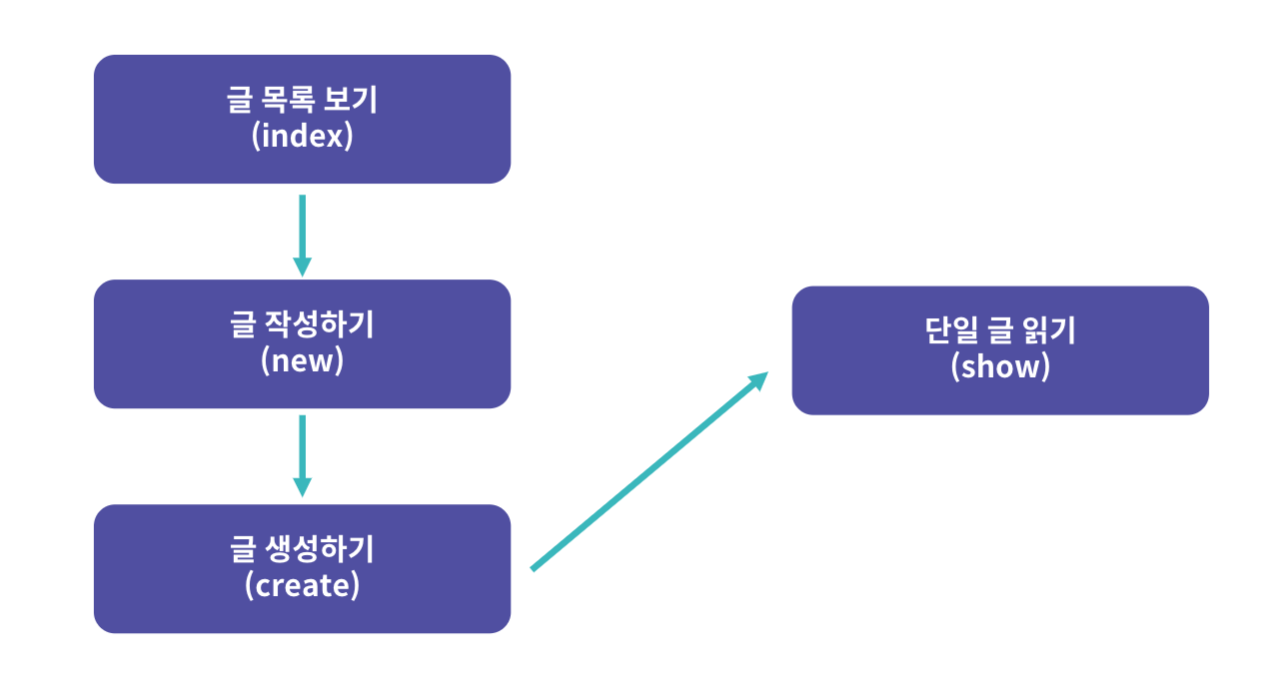

In [3]:
Image("gu.png")

### 처음 Flask 설정
```python
import pymongo
import csv
from bson import ObjectId
from flask import Flask, render_template, request

app = Flask(__name__)
client = pymongo.MongoClient('localhost', 27017)
db = client.get_database("elice")
col = db.get_collection("post")
```

### 목록보기

백엔드
```python
@app.route("/", methods=['GET'])
def index():
    documents = col.find()
    return render_template('index.html', documents=documents)
```
index.html
```html
{% for doc in documents %}
<li><a href="/post/{{ doc._id}}">{{ doc.title}}</a></li>
{% endfor%}
```


### 글 작성하기

백엔드
```python
@app.route("/new")
def new():
    return render_template('main.html')
```
main.html
```html
<h2>Add a Post</h2>
<form action="/create" method="POST">
    <table>
        <tr><td>Title: </td><td><input name="title"></td></tr>
        <tr><td>Content: </td><td><input name="content"></td></tr>
    </table>
</form>
```



### 글 생성하기

```python
@app.route("/create", methods=['POST'])
def save():
    data = {"title": request.form['title'],
            "content": request.form['content']}
    res = col.insert_one(data)
    return redirect(f"/post/{res.inserted_id}")
```

### 글 읽기

```python
@app.route("/post/<_id>", methods=['GET'])
def show(_id):
    post = col.find({ "_id": ObjectId(_id) })[0]
    return render_template('show.html', post=post)
```
show.html
```html
<h2>{{ post.title}}</h2>
_id: {{ post._id}}<br>
Content: {{ post.content}}<br>
```

# 실습 - 넷플릭스 작품 목록보기
지시사항
1. 장식자를 이용해 / URL에서 index.html을 출력하는 index() 메소드를 만드세요. 해당 페이지에는 넷플릭스 작품 목록을 보여줘야 합니다.<br>

2. 장식자를 이용해 neflix/<도큐먼트 _id> URL에서 show.html을 출력하는 show() 메소드를 만드세요. 해당 페이지는 넷플릭스 도큐먼트 내용을 보여줍니다.

```python
import pymongo
import csv
from bson import ObjectId

# Flask를 연동합니다.
from flask import Flask, render_template, request

app = Flask(__name__)

# 데이터를 삽입하는 코드입니다. 수정하지 마세요!
client = pymongo.MongoClient('localhost', 27017)

db = client.get_database("netflix")
col = db.get_collection("titles")

reader = open('netflix_titles.csv', 'r')
data = csv.DictReader(reader, ('show_id','type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description')) 

if col.find().count() == 0:
    result = col.insert_many(data)

# Netflix 작품 목록을 출력합니다.
@app.route("/")
def index():
    title = col.find({})
    return  render_template('index.html', title=title)

# Netflix 작품 하나의 상세 정보를 출력합니다.
@app.route("/netflix/<_id>", methods=['GET'])
def show(_id):
    netflix = col.find({"_id": ObjectId(_id)})[0]
    return render_template('show.html', netflix=netflix)

```


# 실습 - 넷플릭스 작품 생성하기

지시사항
1. /new URL에서 new.html을 출력하는 new() 메소드를 만드세요. 작품 정보를 입력받는 페이지입니다.<br>

2. 장식자를 이용해 /create URL에서 POST 방식으로 전송된 데이터 12개('show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description')를 titles 컬렉션에 삽입하세요. 삽입 이후에 neflix/<도큐먼트 _id>URL로 저장한 도큐먼트 상세 페이지로 리다이렉트 시켜주세요.

```python
import pymongo
import csv
from bson import ObjectId

# Flask를 연동합니다.
from flask import Flask, render_template, request, redirect

app = Flask(__name__)

# 데이터를 삽입하는 코드입니다. 수정하지 마세요!
client = pymongo.MongoClient('localhost', 27017)

db = client.get_database("netflix")
col = db.get_collection("titles")

reader = open('netflix_titles.csv', 'r')
data = csv.DictReader(reader, ('show_id','type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'))

if col.find().count() == 0:
    result = col.insert_many(data)

# Netflix 작품 목록을 출력합니다.
@app.route("/")
def index():
    title = col.find({})
    return render_template('index.html',  title=title)

# Netflix 작품 하나의 상세 정보를 출력합니다.
@app.route("/netflix/<_id>", methods=['GET'])
def show(_id):
    netflix = col.find({"_id": ObjectId(_id)})[0]
    return render_template('show.html', netflix=netflix)

# 작품 정보를 입력받는 페이지입니다.
@app.route("/new")
def new():
    return render_template("new.html")

# ('show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description')를 titles 컬렉션에 삽입하세요.
@app.route("/create",methods=['POST'])
def create():
    data = {
	    "show_id": request.form['show_id'],
	    "type": request.form['type'],
	    "title": request.form['title'],
	    "director": request.form['director'],
	    "cast": request.form['cast'],
	    "country": request.form['country'],
	    "date_added": request.form['date_added'],
	    "release_year": request.form['release_year'],
	    "rating": request.form['rating'],
	    "duration": request.form['duration'],
	    "listed_in": request.form['listed_in'],
	    "description": request.form['description'],

    }
    result = col.insert_one(data)
    return redirect(f"/netflix/{result.inserted_id}")
```